# Analyse Exploratoire

### Import des modules

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [259]:
pd.options.display.max_columns = None

### Analyse Exploratoire

In [261]:
building_consumption = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

In [262]:
# On regarde comment un batiment est défini dans ce jeu de données 
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [263]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [264]:
# Sélection les bâtiments non destinés à l'habitation
building_consumption['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Low-Rise Multifamily',
       'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'High-Rise Multifamily',
       'Office'], dtype=object)

In [265]:
non_residential_building = ['Hotel', 'K-12 School', 'University', 'Small- and Mid-Sized Office','Self-Storage Facility', 'Warehouse', 'Large Office',
                   'Medical Office', 'Retail Store','Hospital', 'Distribution Center','Worship Facility','Senior Care Community',
                   'Supermarket / Grocery Store', 'Laboratory','Refrigerated Warehouse', 'Restaurant']

In [266]:
exploratory_df = building_consumption[building_consumption['PrimaryPropertyType'].isin(non_residential_building)]

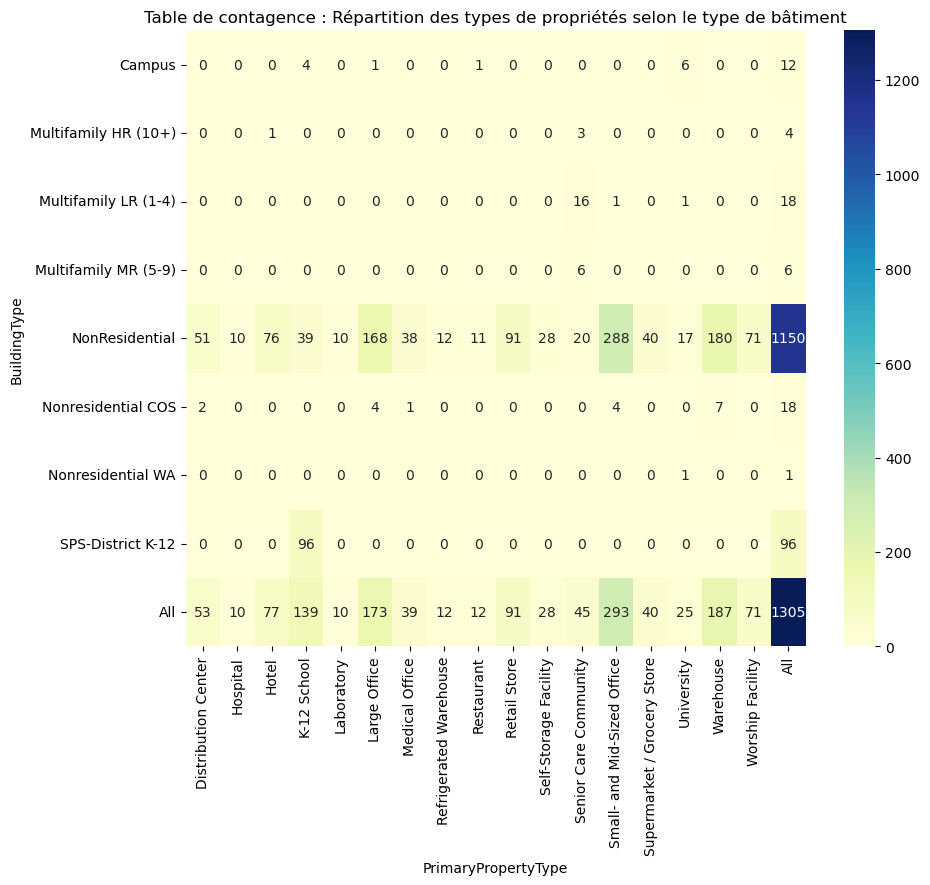

In [267]:
contingency_table = pd.crosstab(exploratory_df['BuildingType'], exploratory_df['PrimaryPropertyType'], margins=True)

plt.figure(figsize=(10,8))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")


plt.title('Table de contagence : Répartition des types de propriétés selon le type de bâtiment')
plt.show()

- La catégorie « NonResidential » domine largement le jeu de données, représentant la grande majorité des observations (1 150 sur 1 305).

- Au sein de ce groupe, le "Top 3" est mené par les bureaux de petite et moyenne taille (Small and Mid-size office) avec 288 unités, suivis des entrepôts (180) et des grands bureaux (168).

- Bien que leur intitulé soit peu explicite, les autres types de bâtiments regroupent tout de même 155 observations, une part non négligeable de l'échantillon total.

In [269]:
quantitative_col = ['YearBuilt','NumberofFloors', 'PropertyGFATotal','NumberofBuildings','ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)','TotalGHGEmissions', 'GHGEmissionsIntensity']

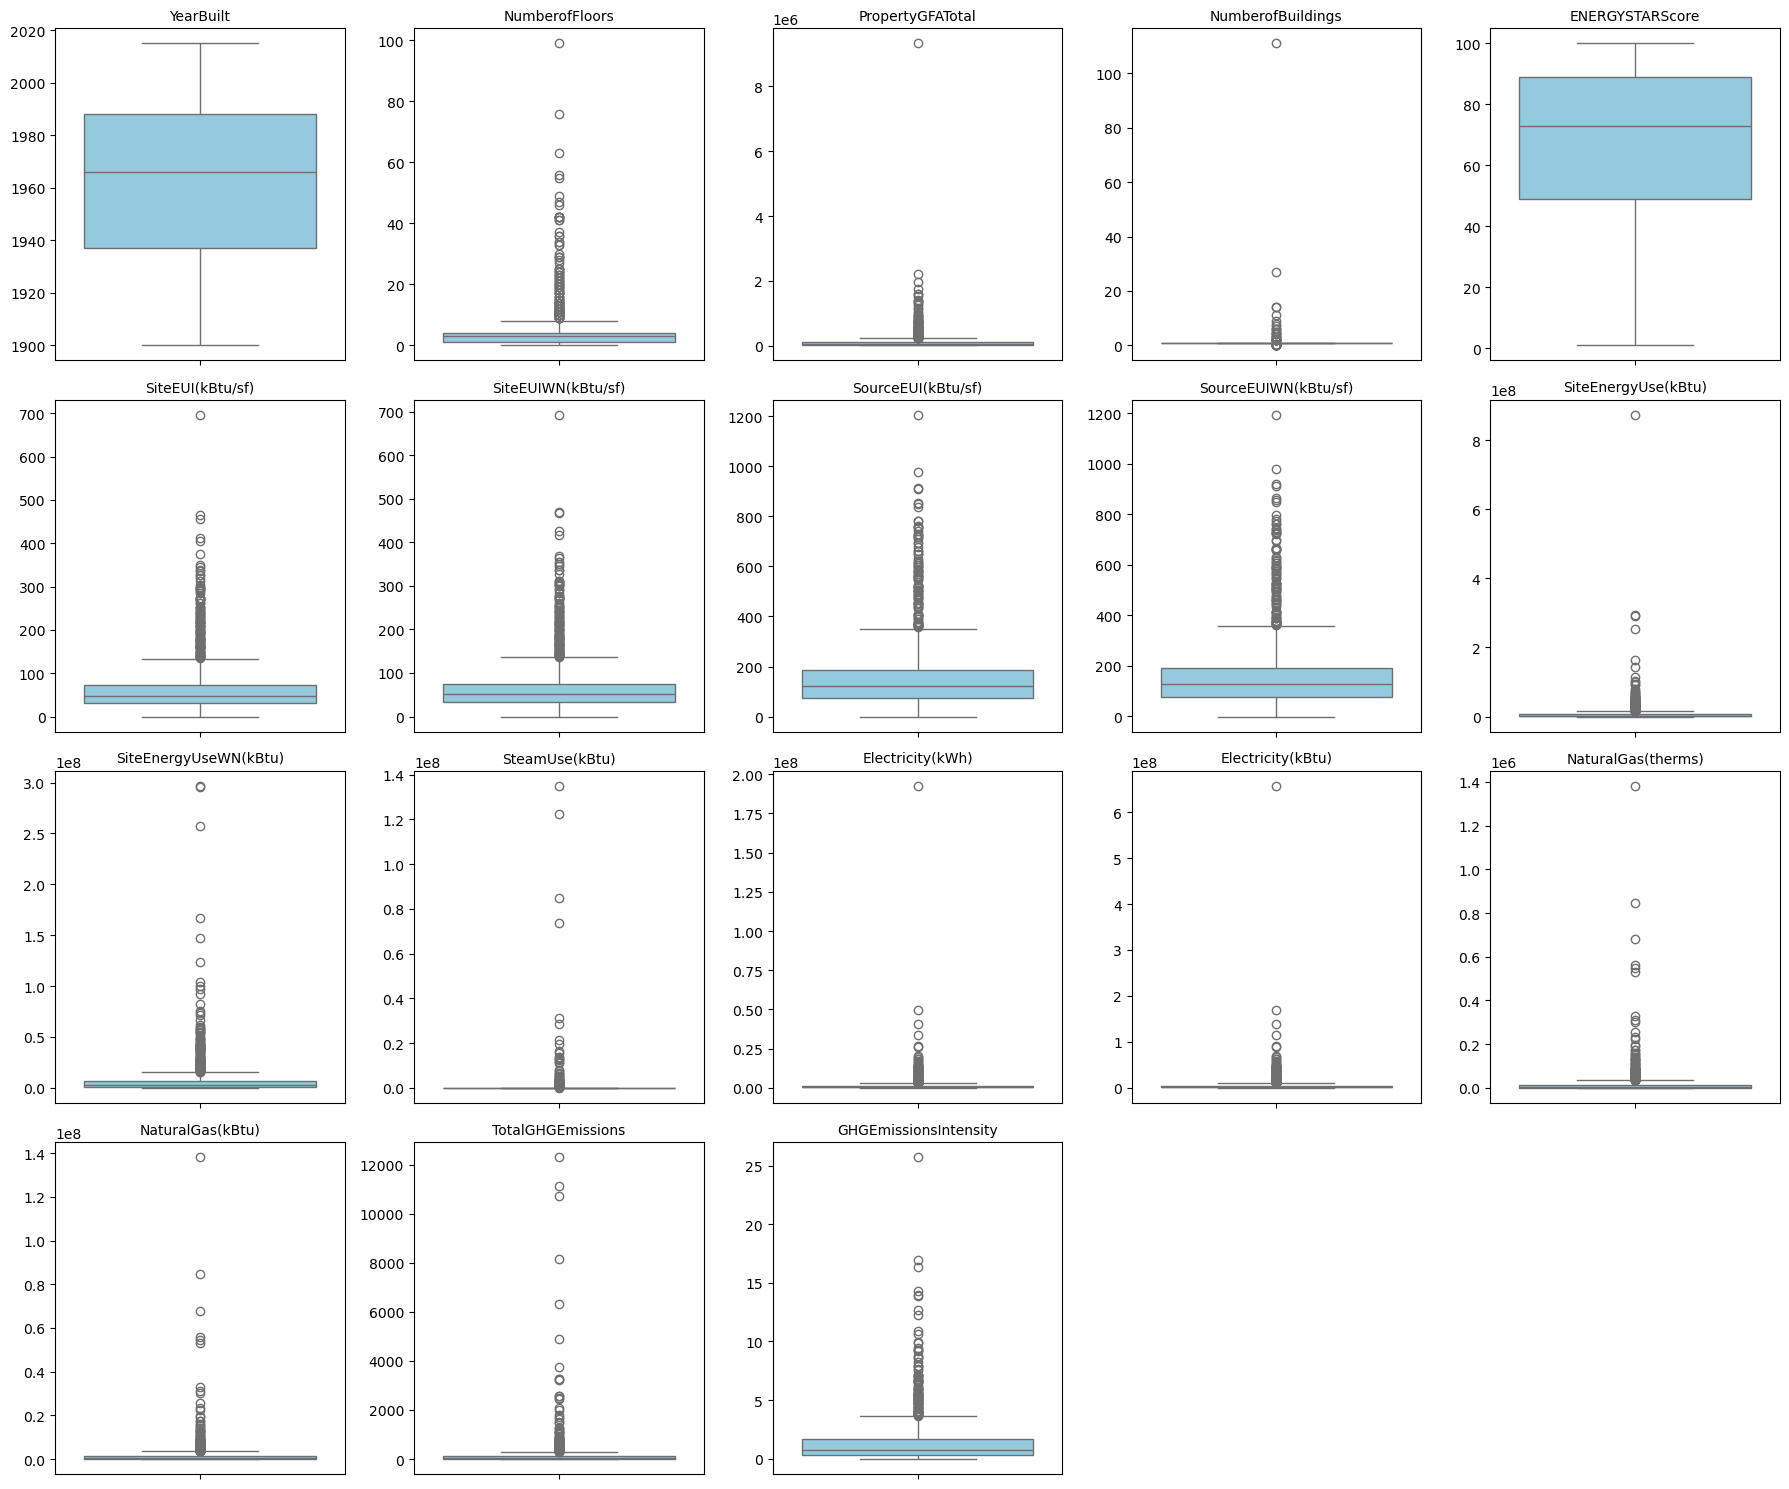

In [270]:
fig, axs = plt.subplots(4, 5, figsize=(18, 15))
axs = axs.flatten()

# On itère sur les colonnes quantitatives
for i, col in enumerate(quantitative_col):
    if i < len(axs):
        # Seaborn gère les NaN automatiquement
        sns.boxplot(data=exploratory_df, y=col, ax=axs[i], color='skyblue')
        
        axs[i].set_title(col, fontsize=10)
        axs[i].set_ylabel('') # Nettoie l'axe Y pour plus de clarté
        axs[i].set_xlabel('')

# Masquer les axes vides
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

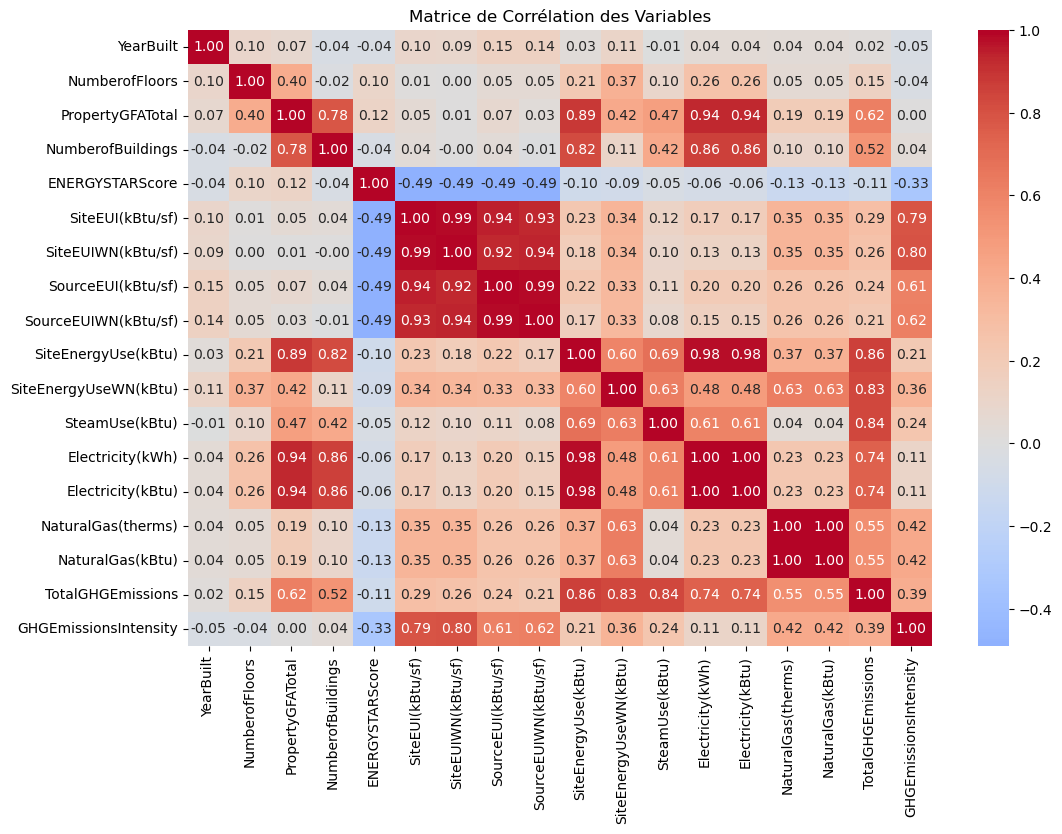

In [271]:
# 1. Calculer la matrice de corrélation
corr = exploratory_df[quantitative_col].corr()

# 2. Configurer la taille de la figure
plt.figure(figsize=(12, 8))

# 3. Créer la heatmap
sns.heatmap(corr, 
            annot=True,       # Affiche les valeurs dans les cases
            fmt=".2f",        # Limite à 2 décimales
            cmap='coolwarm',  # Couleur : bleu (froid/négatif) à rouge (chaud/positif)
            center=0)         # Définit le point blanc à 0

plt.title('Matrice de Corrélation des Variables')
plt.show()

<Axes: xlabel='SiteEnergyUseWN(kBtu)', ylabel='PrimaryPropertyType'>

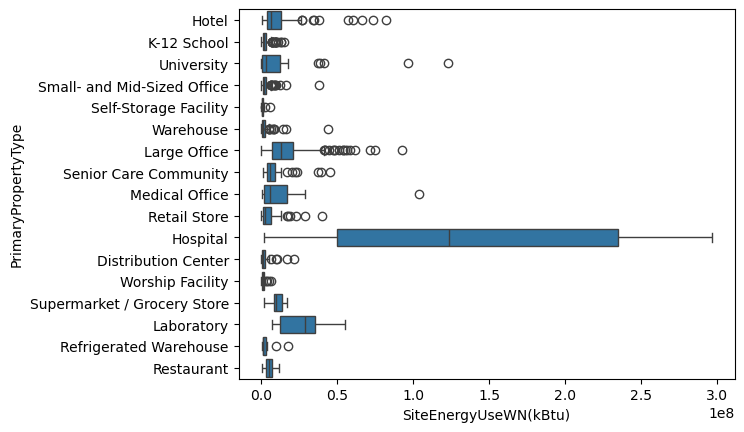

In [272]:
sns.boxplot(data=exploratory_df, x="SiteEnergyUseWN(kBtu)", y="PrimaryPropertyType")

In [273]:
exploratory_df.shape

(1305, 46)

In [274]:
exploratory_df = exploratory_df[exploratory_df['Outlier'].isna()]

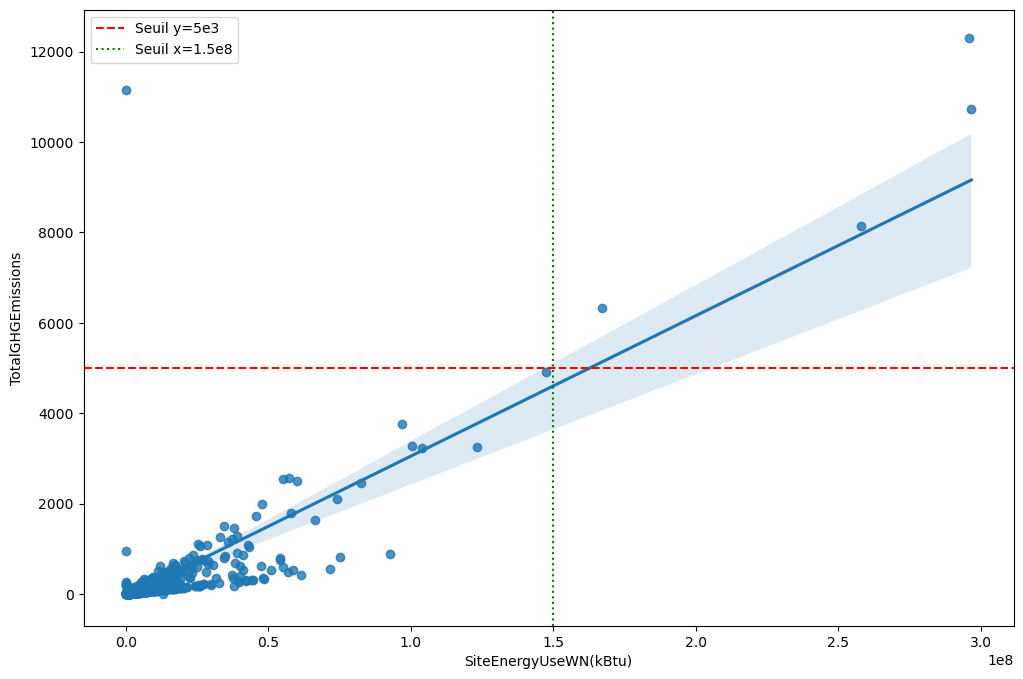

In [275]:
plt.figure(figsize=(12, 8))

sns.regplot(x="SiteEnergyUseWN(kBtu)", y="TotalGHGEmissions", data=exploratory_df)

# 1. Tracer la ligne HORIZONTALE à y = 4500
plt.axhline(y=5000, color='red', linestyle='--', label='Seuil y=5e3')

# 2. Tracer la ligne VERTICALE à x = 1,5e8
plt.axvline(x=1.5e8, color='green', linestyle=':', label='Seuil x=1.5e8')

plt.legend()

plt.show()

In [276]:
exploratory_df.shape

(1292, 46)

In [277]:
df_model = exploratory_df[(exploratory_df['SiteEnergyUseWN(kBtu)'] < 1.5e8) & (exploratory_df['TotalGHGEmissions'] < 5e3)].copy()

In [278]:
df_model.shape

(1285, 46)

#### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

# Modélisation 

### Import des modules 

In [283]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

### Feature Engineering

In [285]:
col_to_keep = ['PrimaryPropertyType','Latitude','Longitude','YearBuilt', 'NumberofBuildings','NumberofFloors', 'PropertyGFATotal', 'SiteEnergyUseWN(kBtu)']

df_model = df_model[col_to_keep]

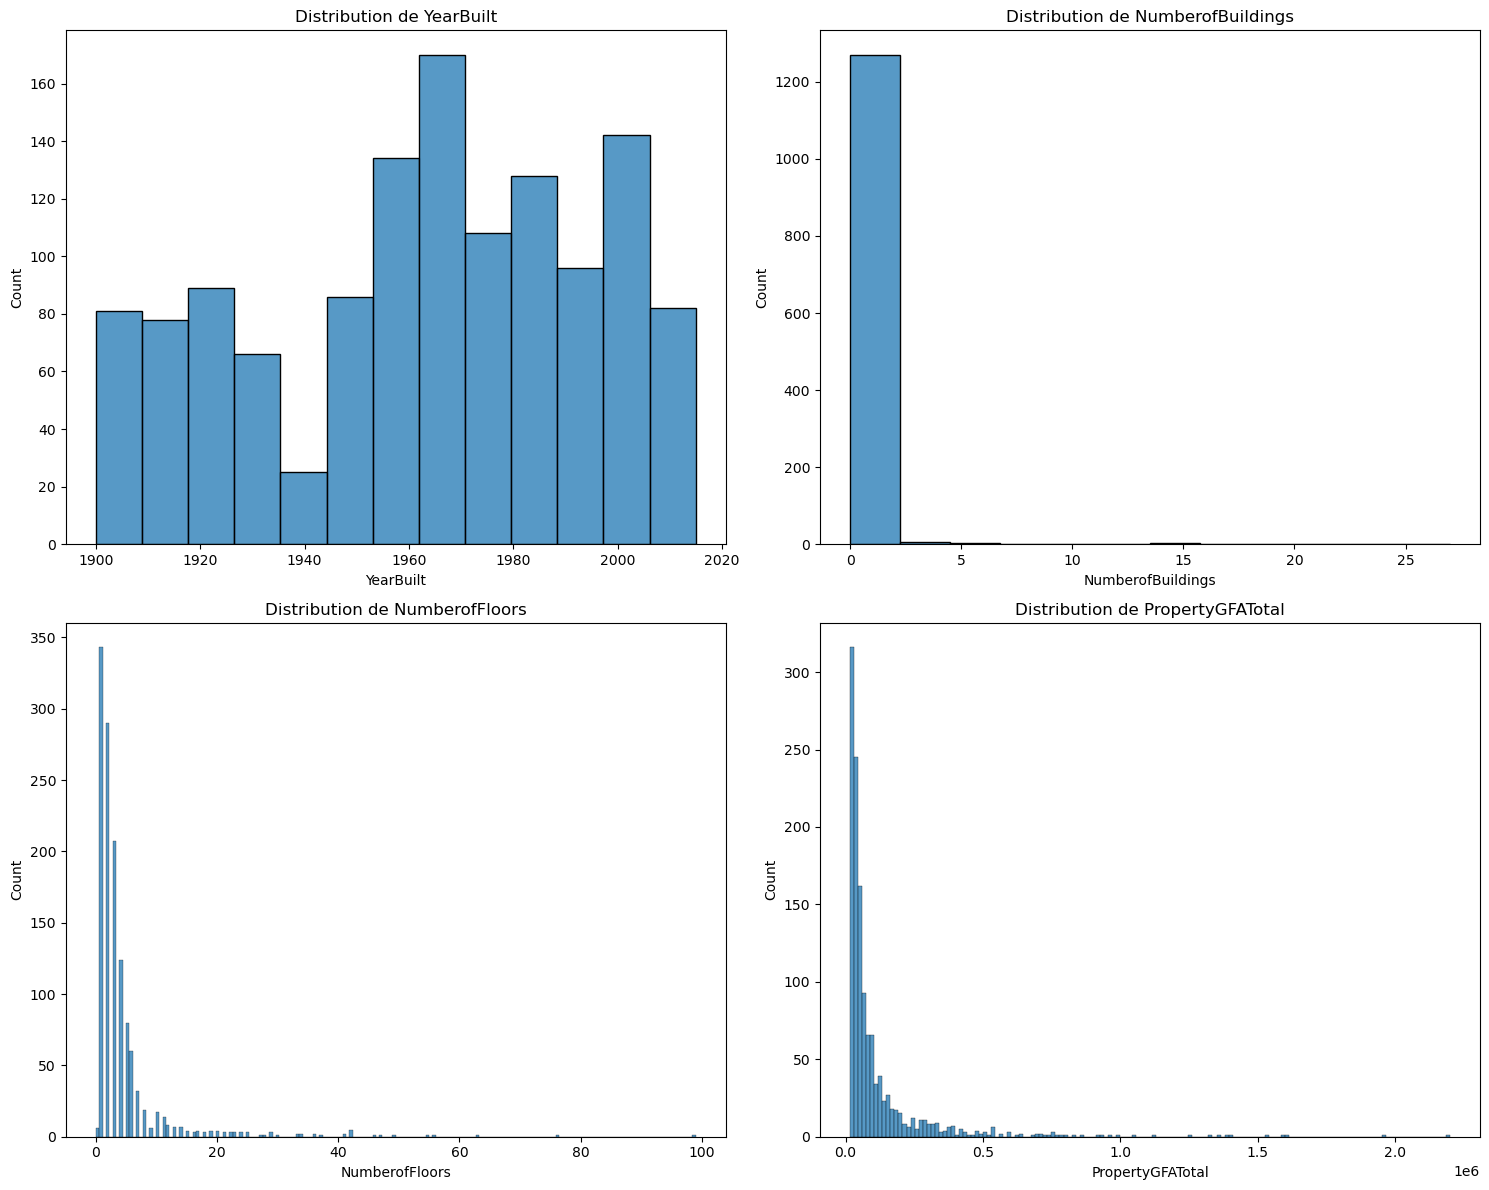

In [286]:
# On crée une figure avec 2 lignes et 2 colonnes
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# On place chaque graphique sur un axe spécifique (ax)
sns.histplot(data=df_model, x="YearBuilt", ax=axes[0, 0])
axes[0, 0].set_title("Distribution de YearBuilt")

sns.histplot(data=df_model, x="NumberofBuildings", ax=axes[0, 1])
axes[0, 1].set_title("Distribution de NumberofBuildings")

sns.histplot(data=df_model, x="NumberofFloors", ax=axes[1, 0])
axes[1, 0].set_title("Distribution de NumberofFloors")

sns.histplot(data=df_model, x="PropertyGFATotal", ax=axes[1, 1])
axes[1, 1].set_title("Distribution de PropertyGFATotal")

# Ajuster l'espacement pour éviter que les titres se chevauchent
plt.tight_layout()
plt.show()

In [287]:
df_model['NumberofBuildings'] = np.where(df_model['NumberofBuildings'] == 0,1,df_model['NumberofBuildings'])
df_model['building_sup_1'] = df_model['NumberofBuildings'] == 1

In [288]:
df_model['category_year_built'] = np.where(df_model['YearBuilt'] < 1945, '1900-1944',
                                  np.where(df_model['YearBuilt'] < 1974, '1945-1973', '1974-2016'))

In [289]:
df_agg = df_model.groupby(['NumberofFloors']).agg({'PrimaryPropertyType' : 'count'}).reset_index()

df_agg = df_agg.rename(columns={'PrimaryPropertyType': 'Count'})

df_agg['Cum_Percent'] = (df_agg['Count'].cumsum() / df_agg['Count'].sum()) * 100

df_agg.head(10)

,NumberofFloors,Count,Cum_Percent
0,0,6,0.466926
1,1,343,27.159533
2,2,290,49.727626
3,3,207,65.836576
4,4,124,75.486381
5,5,80,81.712062
6,6,60,86.381323
7,7,32,88.871595
8,8,19,90.350195
9,9,6,90.817121


In [290]:
bins = [-1, 1, 2, 3, 4, 5, float('inf')]
labels = ['<= 1', '2', '3', '4', '5', '> 5']
df_model['nb_floors_category'] = pd.cut(df_model['NumberofFloors'], bins=bins, labels=labels)

In [291]:
order_year = [['1900-1944', '1945-1973', '1974-2016']]
order_floors = [['<= 1', '2', '3', '4', '5', '> 5']]

enc_year = OrdinalEncoder(categories=order_year)
enc_floors = OrdinalEncoder(categories=order_floors)

df_model['year_built_encoded'] = enc_year.fit_transform(df_model[['category_year_built']])
df_model['nb_floors_encoded'] = enc_floors.fit_transform(df_model[['nb_floors_category']])

In [292]:
df_model_preprocess = df_model.loc[:,['PrimaryPropertyType','Latitude','Longitude','year_built_encoded','building_sup_1','nb_floors_encoded','PropertyGFATotal','SiteEnergyUseWN(kBtu)']]

In [293]:
df_model_preprocess = pd.get_dummies(df_model_preprocess, columns=['PrimaryPropertyType'], prefix='Type')
df_model_preprocess

,Latitude,Longitude,year_built_encoded,building_sup_1,nb_floors_encoded,PropertyGFATotal,SiteEnergyUseWN(kBtu),Type_Distribution Center,Type_Hospital,Type_Hotel,Type_K-12 School,Type_Laboratory,Type_Large Office,Type_Medical Office,Type_Refrigerated Warehouse,Type_Restaurant,Type_Retail Store,Type_Self-Storage Facility,Type_Senior Care Community,Type_Small- and Mid-Sized Office,Type_Supermarket / Grocery Store,Type_University,Type_Warehouse,Type_Worship Facility
0,47.61220,-122.33799,0.0,True,5.0,88434,7.456910e+06,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,47.61317,-122.33393,2.0,True,5.0,103566,8.664479e+06,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,47.61393,-122.33810,1.0,True,5.0,956110,7.393711e+07,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,47.61412,-122.33664,0.0,True,5.0,61320,6.946800e+06,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,47.61375,-122.34047,2.0,True,5.0,175580,1.465650e+07,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,47.65476,-122.34732,2.0,True,3.0,126823,6.042400e+06,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3338,47.54425,-122.31776,1.0,True,0.0,52085,4.182622e+06,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3339,47.53161,-122.29944,0.0,True,1.0,24990,4.731814e+06,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3347,47.58831,-122.30650,2.0,True,2.0,45000,1.397742e+06,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [294]:
X = df_model_preprocess.drop('SiteEnergyUseWN(kBtu)', axis=1)
y = df_model_preprocess['SiteEnergyUseWN(kBtu)']

# X = vos features, y = votre target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)


lr = LinearRegression()
lr.fit(X_train, y_train)


svr = SVR(kernel='rbf') 
svr.fit(X_train, y_train)


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)



models = [dummy, lr, svr, rf]
for model in models:
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} - R2: {r2_score(y_test, y_pred):.3f}")

DummyRegressor - R2: -0.011
LinearRegression - R2: 0.738
SVR - R2: -0.114
RandomForestRegressor - R2: 0.631


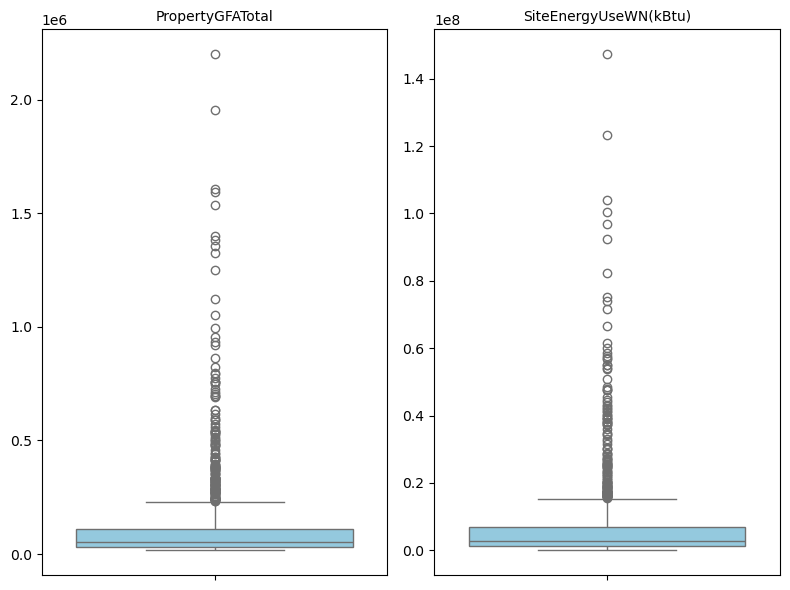

In [295]:
fig, axs = plt.subplots(1, 2, figsize=(8, 6))
axs = axs.flatten()

# On itère sur les colonnes quantitatives
for i, col in enumerate(['PropertyGFATotal','SiteEnergyUseWN(kBtu)']):
    if i < len(axs):
        # Seaborn gère les NaN automatiquement
        sns.boxplot(data=df_model_preprocess, y=col, ax=axs[i], color='skyblue')
        
        axs[i].set_title(col, fontsize=10)
        axs[i].set_ylabel('') # Nettoie l'axe Y pour plus de clarté
        axs[i].set_xlabel('')

# Masquer les axes vides
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

In [296]:
def modified_z_score(data):
    median = np.median(data)
    # Calcul de la MAD (Median Absolute Deviation)
    mad = np.median(np.abs(data - median))
    
    # Calcul du score modifié
    # On ajoute une petite valeur au dénominateur pour éviter la division par zéro
    m_z_score = 0.6745 * (data - median) / (mad + 1e-8)
    
    return np.abs(m_z_score)

# Test sur nos données
data = df_model_preprocess['SiteEnergyUseWN(kBtu)']
scores = modified_z_score(data)

# Identification (seuil conseillé : 3.5)
outliers = data[scores > 3.5]

In [297]:
df_model_preprocess = df_model_preprocess.copy()
df_model_preprocess = df_model_preprocess[~df_model_preprocess['SiteEnergyUseWN(kBtu)'].isin(outliers)]

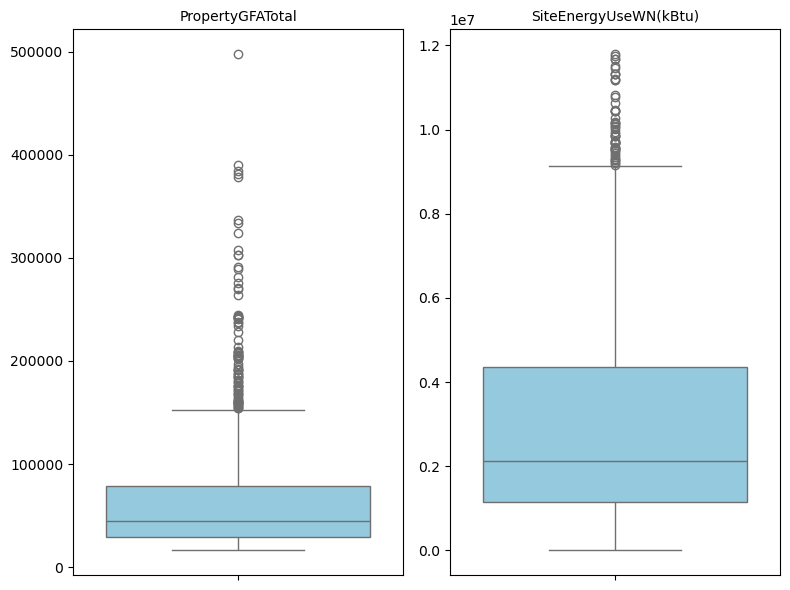

In [298]:
fig, axs = plt.subplots(1, 2, figsize=(8, 6))
axs = axs.flatten()

# On itère sur les colonnes quantitatives
for i, col in enumerate(['PropertyGFATotal','SiteEnergyUseWN(kBtu)']):
    if i < len(axs):
        # Seaborn gère les NaN automatiquement
        sns.boxplot(data=df_model_preprocess, y=col, ax=axs[i], color='skyblue')
        
        axs[i].set_title(col, fontsize=10)
        axs[i].set_ylabel('') # Nettoie l'axe Y pour plus de clarté
        axs[i].set_xlabel('')

# Masquer les axes vides
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

In [299]:
X = df_model_preprocess.drop('SiteEnergyUseWN(kBtu)', axis=1)
y = df_model_preprocess['SiteEnergyUseWN(kBtu)']

# X = vos features, y = votre target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)


lr = LinearRegression()
lr.fit(X_train, y_train)


svr = SVR(kernel='rbf') 
svr.fit(X_train, y_train)


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

models = [dummy, lr, svr, rf]
for model in models:
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} - R2: {r2_score(y_test, y_pred):.3f}")

DummyRegressor - R2: -0.004
LinearRegression - R2: 0.437
SVR - R2: -0.159
RandomForestRegressor - R2: 0.572
